# Topological Collocation and Keyword-Keyphrase Extraction

In [1]:
pip install transformers torch numpy gudhi -q

Note: you may need to restart the kernel to use updated packages.


The context vector is a critical part of the multihead attention mechanism in transformers. As indicated by the provided formula:

$$\mathbf{c}_{i}^{l,h} = \sum_{j=1}^{n} a_{i, j}^{l,h} \mathbf{v}_{j}^{l,h}$$

the context vector $\mathbf{c}_{i, l}^h$ for the $h^{th}$ head in layer $l$ is computed as a weighted sum of the value vectors $\mathbf{v}_{j}^{l,h}$, where the weights are the attention scores $a_{ij}^{l,h}$. Here, $n$ is the number of value vectors, corresponding to the number of input tokens for the attention mechanism.

The attention scores $a_{ij}^{l,h}$ for attention head $k$ in layer $l$, themselves are computed using the query and key vectors. In the scaled dot-product attention mechanism typically used in transformers, the attention score between the $i^{th}$ query $\mathbf{q}_i^{l,h}$ and the $j^{th}$ key $\mathbf{k}_j^{l,h}$ is computed as:

$$a_{ij}^{l,h} = \frac{\exp(\mathbf{q}_i^{l,h} \cdot \mathbf{k}_j^{l,h} / \sqrt{d})}{\sum_{m=1}^{n} \exp(\mathbf{q}_i^{l,h} \cdot \mathbf{k}_m^{l,h} / \sqrt{d})}$$

where $d$ is the dimensionality of the queries and keys, and $\cdot$ denotes the dot product. The division by $\sqrt{d}$ is a scaling factor that is used to prevent the dot product from growing too large in magnitude, which could lead to vanishing gradients during training. The softmax function is applied to the raw attention scores to ensure that they sum up to $1$, allowing them to be interpreted as probabilities or relative importances.

The queries, keys, and values are themselves computed by applying learned linear transformations to the input embeddings. If $\mathbf{x}_i$ denotes the input embedding for the $i^{th}$ token, then we have:

$$\mathbf{q}_i^{l,h} = W_Q^{l, h} \mathbf{x}_i$$
$$\mathbf{k}_i^{l,h} = W_K^{l, h} \mathbf{x}_i$$
$$\mathbf{v}_i^{l,h} = W_V^{l, h} \mathbf{x}_i$$

where $W_Q^{l,h}$, $W_K^{l,h}$, and $W_V^{l,h}$ are the weight matrices for the queries, keys, and values, respectively, for the $k^{th}$ head in the $l^{th}$ layer.

The context vectors $\mathbf{c}_{i, l}^h$ provide a summary of the input tokens, weighted by their relevance to the query. They can be thought of as a form of "contextualized" embedding, where the context is determined by the other tokens in the input sequence and their interaction weight given by the attention matrix $a_{ij}^{l,h}$ for head $h \in \{1, 2, ..., \mathcal{H}\}$. The multihead attention mechanism allows the model to capture different types of relevance or "attention" by using multiple heads, each with its own learned linear transformations.

In the multihead attention mechanism, the attention operation is not performed just once, but multiple times in parallel. The queries, keys, and values are transformed with different learned linear projections to $h$ different sets of queries, keys, and values, where $h$ is the number of heads. Then the attention mechanism is applied to each of these sets, yielding $h$ output vectors, which are then concatenated and linearly transformed to result in the final output.

Let $W_Q^{l,h}$, $W_K^{l,h}$, and $W_V^{l,h}$ denote the weight matrices for the $h^{th}$ head for the queries, keys, and values, respectively, in the $l^{th}$ layer, and let $W_O^{l}$ denote the output weight matrix for layer $l$. Then the output of the multihead attention mechanism for layer $l$ is computed as:

$$\mathbf{c}_i^l = W_O^{l} [\mathbf{c}_{i}^{l,h}; \mathbf{c}_{i}^{l,h}; \ldots; \mathbf{c}_{i}^{l, \mathcal{H}}]$$

where $\mathbf{c}_{i}^{l,h}$ is the output of the attention mechanism for the $h^{th}$ head in layer $l$, for token $x_i$, computed as:

$$\mathbf{c}_{i}^{l,h} = \sum_{j=1}^{n} a_{ij}^{l,h} \mathbf{v}_{j}^{l,h}$$

## GPT-2 Attention Matrix

In [2]:
from transformers import GPT2Model, GPT2Tokenizer

def compute_attention_matrix_gpt_2(sentence, layer, head):
    # Load pretrained model/tokenizer
    model = GPT2Model.from_pretrained('gpt2', output_attentions=True)
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

    # Tokenize input sentence
    inputs = tokenizer(sentence, return_tensors='pt')

    # Pass through model
    outputs = model(**inputs)

    # Get the attention weights
    attentions = outputs.attentions

    # Extract the attention weights for the specified layer and head
    attention_matrix = attentions[layer][0, head].detach().numpy()

    return attention_matrix


In [3]:
sentence = "Deep learning is fascinating"
layer = 2
head = 3

gpt_2_attention_matrix = compute_attention_matrix_gpt_2(sentence, layer, head)
print(gpt_2_attention_matrix.shape)
print(gpt_2_attention_matrix)

(4, 4)
[[1.         0.         0.         0.        ]
 [0.9799156  0.02008435 0.         0.        ]
 [0.81174487 0.13985004 0.04840514 0.        ]
 [0.33955273 0.15688916 0.21757792 0.2859802 ]]


## BERT Attention Matrix

In [4]:
from transformers import BertModel, BertTokenizer

def compute_attention_matrix_bert(sentence, layer, head):
    # Load pretrained model/tokenizer
    model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize input sentence
    inputs = tokenizer(sentence, return_tensors='pt')

    # Pass through model
    outputs = model(**inputs)

    # Get the attention weights
    attentions = outputs.attentions

    # Extract the attention weights for the specified layer and head
    attention_matrix = attentions[layer][0, head].detach().numpy()

    return attention_matrix


In [5]:
sentence = "Deep learning is fascinating"
layer = 2
head = 3

bert_attention_matrix = compute_attention_matrix_bert(sentence, layer, head)
print(bert_attention_matrix.shape)
print(bert_attention_matrix)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(6, 6)
[[0.65833837 0.02821147 0.05961464 0.06537832 0.06500569 0.12345145]
 [0.7571759  0.00225254 0.01708878 0.0295937  0.02422678 0.1696624 ]
 [0.5111288  0.01439373 0.00574702 0.07166345 0.06277563 0.33429137]
 [0.42424822 0.03885158 0.04304642 0.08848479 0.0646913  0.3406777 ]
 [0.71238786 0.01339824 0.05244174 0.03502652 0.01661684 0.17012876]
 [0.7925911  0.01647069 0.035555   0.02690707 0.03360174 0.09487453]]


Each transformer layer comprises a multihead self-attention mechanism, followed by layer normalization, a position-wise feed-forward network, and another layer normalization. Let's denote the $l^{th}$ transformer layer in the model, where $l$ ranges from 1 to $L$ (with $L$ being the total number of layers). 

1. **Multihead Self-Attention Mechanism**: The multihead self-attention mechanism in the $l^{th}$ layer operates on the input embeddings $\mathbf{x}_i^l$, transforming them into queries $\mathbf{q}_i^{l,h}$, keys $\mathbf{k}_i^{l,h}$, and values $\mathbf{v}_i^{l,h}$ for each head $h$ as before. Then the context vectors are computed, and concatenated as before, and the weight matrix $W_O^l$ is applied to get $\mathbf{c}_i^l$

2. **Layer Normalization**: Layer normalization stabilizes the learning process and reduces internal covariate shift by normalizing the multihead self-attention output across the hidden dimension. For the $l^{th}$ layer, this is computed as:

    $$\mathbf{c'}_i^l = \frac{\mathbf{c}_i^l - \mu^{l}}{\sigma^{l}}$$

   where $\mu^{l}$ and $\sigma^{l}$ are the mean and standard deviation of the layer outputs, computed as:

    $$\mu^{l} = \frac{1}{H}\sum^{H}_{i=1}c_{i}^l$$
    $$\sigma^{l} = \sqrt{\frac{1}{H}\sum^{H}_{i=1}\left(c_{i}^l-\mu^{l}\right)^{2}}$$

3. **Position-Wise Feed-Forward Network (FFN)**: The output of the layer normalization is then passed through a position-wise feed-forward network (FFN). The

The output of the layer normalization is then passed through a position-wise feed-forward network (FFN). The FFN consists of two linear transformations with a ReLU activation in between. For each position $i$, the FFN is applied to $\mathbf{c}_i'^l$ independently. Let's denote the weight matrices and bias vectors of the two linear transformations as $W_1^l$, $b_1^l$, $W_2^l$, and $b_2^l$, respectively. Then the output of the FFN is computed as:

$$\mathbf{d}_i^l = W_2^l \mathbf{max}(0, W_1^l \mathbf{c'}_i^l + b_1^l) + b_2^l$$

where $\max(0, x)$ denotes the ReLU activation function.

4. **Second Layer Normalization**: Finally, the output of the FFN goes through another layer normalization step to compute the final output of the transformer layer:

$$\mathbf{o}_i^l = \frac{\mathbf{d}_i^l - \mu^l}{\sigma^l}$$

where again, $\mu^l$ and $\sigma^l$ are the mean and standard deviation of the layer outputs, computed similarly as before but now with $\mathbf{d}_i^l$ instead of $\mathbf{c}_i^l$.

In the following code, the `outputs.hidden_states[layer]` attribute in the context of transformer models typically refers to the matrix $O_l = [\mathbf{o}_1^l; \mathbf{o}_2^l; \ldots; \mathbf{o}_n^l]$, where $n$ is the number of input tokens, and $L$ is the total number of layers in the transformer model.

In [6]:
from transformers import BertModel, BertTokenizer
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

inputs = tokenizer("Deep learning is fascinating", return_tensors="pt")

# Specify `output_hidden_states=True` when calling the model
outputs = model(**inputs, output_hidden_states=True)

# Now you can access the hidden states at a specific layer
layer = 0
hidden_states = outputs.hidden_states[layer]
print(hidden_states.shape)
print(hidden_states)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([1, 6, 768])
tensor([[[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
         [ 0.0594,  0.6532, -0.1400,  ..., -0.8445,  0.6568, -0.2210],
         [-1.5690, -0.1996,  0.0325,  ...,  0.4756,  0.2562, -0.7868],
         [-0.4970, -0.2288, -0.4677,  ...,  0.4528,  0.2378,  0.5511],
         [ 0.8615,  0.3349,  0.3782,  ...,  0.0857, -0.1091,  0.5007],
         [-0.3251, -0.3188, -0.1163,  ..., -0.3960,  0.4112, -0.0776]]],
       grad_fn=<NativeLayerNormBackward0>)


Let's reintroduce the BERT model in slightly different notation now, using matrices to collect all of the queries, keys, and values. 

**1. Word Embeddings and Positional Encoding**

Given a sequence of input tokens, $X = \{x_1, x_2, ..., x_n\}$, each token is converted into a word embedding vector using an embedding lookup table $E$. Hence, the word embeddings $Z$ are calculated as:

$$ Z = \{E(x_1), E(x_2), ..., E(x_n)\} $$

In BERT, the word embeddings are then summed with a positional encoding $P$ to retain the positional information, giving us:

$$ Z' = Z + P $$

**2. Transformer Encoder Layers**

A Transformer encoder consists of a stack of identical layers. Each layer has two sub-layers: a multi-head self-attention mechanism, and a position-wise fully connected feed-forward network. For the input to the $l^{th}$ layer, denoted $H^{(l)}$, we have $H^{(1)} = Z'$ for the first layer.

**2.1. Multi-Head Self-Attention**

The multi-head self-attention mechanism computes a weighted sum of the input vectors, where the weights are determined by the attention scores between the token and all tokens in the sequence.

In the self-attention mechanism, three sets of learned linear transformations are applied to the input vectors $H^{(l)}$ to compute the query $Q^{(l, h)}$, key $K^{(l, h)}$, and value $V^{(l, h)}$ vectors for each head $h$ in the layer $l$:

$$Q^{(l, h)} = H^{(l)}W_{Q}^{l, h}$$
$$K^{(l, h)} = H^{(l)}W_{K}^{l, h}$$
$$V^{(l, h)} = H^{(l)}W_{V}^{l, h}$$

where $W_{q}^{(l, h)}$, $W_{k}^{(l, h)}$, and $W_{v}^{(l, h)}$ are the weight matrices for the query, key, and value transformations at the $l^{th}$ layer for the $h^{th}$ head.

Then, the attention scores $S^{(l, h)}$ are computed by taking the dot product of the query and key vectors, followed by a softmax:

$$ S^{(l, h)} = \text{softmax}\left(\frac{Q^{(l, h)}{K^{(l, h)}}^T}{\sqrt{d_k}}\right) $$

where $d_k$ is the dimension of the key vectors.

The output of the self-attention mechanism for each head is a weighted sum of the value vectors, using the attention scores as weights:

$$ O^{(l, h)} = S^{(l, h)}V^{(l, h)} $$

The output vectors of all heads are then concatenated and linearly transformed to result in the final output of the multi-head self-attention mechanism:

$$ A^{(l)} = [O^{(l, 1)}, ..., O^{(l, \mathcal{H})}]W_{O}^{(l)} $$

where $\mathcal{H}$ is the number of heads, and $W_{o}^{(l)}$ is a learned weight matrix.

**2.2. Position-Wise Feed-Forward Networks**

The output of the multi-head self-attention mechanism is then passed through a position-wise feed-forward network (FFN).

Apologies for the abrupt cut-off. Let's continue with the explanation.

This network is applied independently to each position:

$$ F^{(l)} = \text{FFN}(A^{(l)}) $$

where FFN represents the feed-forward network.

**2.3. Residual Connections and Layer Normalization**

In the case of a Transformer encoder layer, there are two sub-layers:

1. The multi-head self-attention mechanism
2. The position-wise feed-forward network

Each of these sub-layers uses a shortcut connection (residual connection), and the output of each is normalized separately. So, what the notation is trying to express is that the output of the $l^{th}$ layer before and after each sub-layer is normalized separately.

Let's denote the output of the self-attention mechanism as $A^{(l)}$ and the output of the feed-forward network as $F^{(l)}$. Now, let's denote the input to the $l^{th}$ layer as $H^{(l)}$, and the output of the $l^{th}$ layer as $H^{(l+1)}$. 

The processing of the $l^{th}$ layer can then be expressed as follows:

1. Multi-Head Self-Attention:

    $$ A^{(l)} = \text{MultiHeadSelfAttention}(H^{(l)}) $$
    $$ H_{\text{intermediate}}^{(l+1)} = \text{LayerNorm}(H^{(l)} + A^{(l)}) $$

    Here, $H_{\text{intermediate}}^{(l+1)}$ is the output after the self-attention mechanism, including the residual connection and layer normalization.

2. Position-Wise Feed-Forward Networks:

    $$ F^{(l)} = \text{FFN}(H_{\text{intermediate}}^{(l+1)}) $$
    $$ H^{(l+1)} = \text{LayerNorm}(H_{\text{intermediate}}^{(l+1)} + F^{(l)}) $$

    Here, the FFN is applied to $H_{\text{intermediate}}^{(l+1)}$, not $H^{(l)}$.

So, $H^{(l+1)}$ is the result of the entire $l^{th}$ layer, which includes both the self-attention and feed-forward sub-layers. The residual connections and layer normalization operations are applied separately after each sub-layer. There are two steps in the process, and layer normalization is applied after each step.

**3. Output**

The output of the final layer $L$ of the Transformer encoder is the sequence of vectors $H^{(L+1)}$, which serves as the contextualized representation of the input tokens. This corresponds to `outputs.last_hidden_state` in the code.

If we denote `outputs.last_hidden_state` as $H$, then $H[0]$ corresponds to the contextualized representation of the first token in the input sequence.

Please note that the above explanation is a simplification of the actual computations involved in the BERT model. BERT also incorporates several other features, such as token type embeddings for distinguishing different sentences in the same input, and a special [CLS] token at the beginning of the input for classification tasks. 

The next block of code computes all of the context vectors for all of the `layer`s and `head`s at once, but we just want to look at, 

$$ O^{(l, h)} = S^{(l, h)}V^{(l, h)}. $$

In [7]:
import torch
from transformers import BertTokenizer, BertModel

def compute_output_1(sentence, layer, head):
    # Load pre-trained model
    model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize input and convert to tensor
    inputs = tokenizer(sentence, return_tensors="pt")

    # Forward pass
    # Specify `output_hidden_states=True` when calling the model
    outputs = model(**inputs, output_hidden_states=True)

    # Obtain the attention weights
    attentions = outputs.attentions

    # Obtain the attention weights for the specific layer and head
    S = attentions[layer][0, head]

    # Obtain the value vectors
    model.eval()
    with torch.no_grad():
        hidden_states = outputs.hidden_states[layer]
        W_v = model.encoder.layer[layer].attention.self.value.weight
        V = torch.matmul(hidden_states, W_v.t())

    # Compute the output O
    O = torch.matmul(S, V)

    return O

In [8]:
# Test the function
sentence = "Deep learning is fascinating"
layer = 0  # Layer index
head = 0  # Head index
output = compute_output_1(sentence, layer, head)
print(output.shape)
print(output)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([1, 6, 768])
tensor([[[ 0.6161,  0.0203,  0.0927,  ..., -0.0607,  0.2400, -0.0631],
         [ 0.5375,  0.0317,  0.0341,  ..., -0.1485,  0.2741, -0.1216],
         [ 0.4041,  0.0027,  0.0068,  ..., -0.2113,  0.2521, -0.1607],
         [ 0.5031,  0.0235, -0.0346,  ..., -0.2013,  0.2198, -0.1369],
         [ 0.2977,  0.0328,  0.0355,  ..., -0.2225,  0.2670, -0.1371],
         [ 0.6082,  0.0109,  0.0203,  ..., -0.1514,  0.2542, -0.1082]]],
       grad_fn=<CloneBackward0>)


In the Transformer model, each head has its own weight matrices $W_Q^{l,h}$, $W_K^{l,h}$, and $W_V^{l,h}$ for query, key, and value transformations, respectively. However, in the implementation of Hugging Face's transformers, these weights are stored in one combined tensor for efficiency. Specifically, these weight matrices are combined along the output dimension (i.e., the dimension corresponding to the hidden size), so the shape of the combined tensor is [hidden_size, hidden_size].

To obtain the weight matrix for a specific head, we need to split this combined tensor along the output dimension and select the corresponding portion. Here's how to do it:

In [9]:
import torch
from transformers import BertTokenizer, BertModel

def compute_output(sentence, layer, head):
    # Load pre-trained model
    model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize input and convert to tensor
    inputs = tokenizer(sentence, return_tensors="pt")

    # Forward pass
    # Specify `output_hidden_states=True` when calling the model
    outputs = model(**inputs, output_hidden_states=True)

    # Obtain the attention weights
    attentions = outputs.attentions

    # Obtain the attention weights for the specific layer and head
    S = attentions[layer][0, head]

    # Obtain the value vectors
    model.eval()
    with torch.no_grad():
        hidden_states = outputs.hidden_states[layer]
        all_W_v = model.encoder.layer[layer].attention.self.value.weight
        num_heads = model.config.num_attention_heads
        head_dim = model.config.hidden_size // num_heads
        W_v_heads = all_W_v.view(num_heads, head_dim, model.config.hidden_size)
        W_v = W_v_heads[head]
        V = torch.matmul(hidden_states, W_v.t())

    # Compute the output O
    O = torch.matmul(S, V)

    return O


In [10]:
# Test the function
sentence = "Deep learning is fascinating"
layer = 0  # Layer index
head = 0  # Head index
output = compute_output(sentence, layer, head)
print(output.shape)
print(output)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([1, 6, 64])
tensor([[[ 0.6161,  0.0203,  0.0927,  0.1709, -0.5999,  0.2016,  0.2058,
           0.0541,  0.0303,  0.0732, -0.4342,  0.0593, -0.1368,  0.1146,
           0.0990,  0.1922, -0.2231,  0.2022, -0.4174,  0.0530,  0.2061,
           0.0966,  0.0493,  0.2927,  0.1682,  0.0812, -0.3396,  0.0712,
           0.3388,  0.0566, -0.0778, -0.0397, -0.4107,  0.2250,  0.1740,
          -0.0221,  0.2643, -0.2039,  0.1421,  0.3994, -0.1633, -0.2542,
           0.2551,  0.3152, -0.0846,  0.0445,  0.3512, -0.4743, -0.2733,
           0.3233, -0.1005,  0.1634, -0.4508, -0.1815,  0.1717, -0.0284,
           0.4119,  0.2804,  0.0192, -0.4636,  0.1365,  0.4404,  0.0805,
           0.3921],
         [ 0.5375,  0.0317,  0.0341,  0.2105, -0.4331,  0.1121,  0.1402,
           0.0348,  0.0429,  0.1176, -0.3509,  0.2004, -0.1399, -0.0059,
          -0.0320,  0.1172, -0.1960,  0.3601, -0.2545, -0.0250,  0.3612,
           0.0695, -0.1173,  0.2478,  0.0480,  0.0372, -0.2670, -0.1288,
        

## Clustering Context Vectors with Persistent Homology

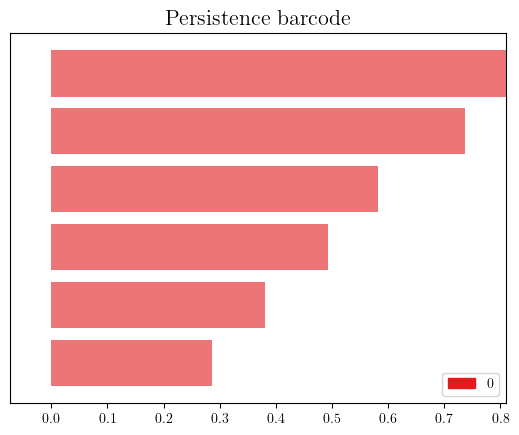

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance_matrix
import gudhi as gd

def compute_distances_and_plot_barcode(output):
    # Detach the output tensor, squeeze, and convert to numpy array
    output_np = output.squeeze().detach().numpy()

    # Compute the pairwise Euclidean distance matrix
    distances = distance_matrix(output_np, output_np)

    # Compute the persistent homology of the distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=distances, max_edge_length=np.max(distances))
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistent_homology = simplex_tree.persistence(min_persistence=0.001)
    
    # Plot the barcode diagram
    gd.plot_persistence_barcode(persistence=persistent_homology)
    plt.show()

# Test the function
compute_distances_and_plot_barcode(output)


In [12]:
import torch
import gudhi as gd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.spatial import distance_matrix
from mpl_toolkits.mplot3d import Axes3D
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Define the function to compute the output
def compute_output(sentence, layer, head):
    # Load pre-trained model
    model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize input and convert to tensor
    inputs = tokenizer(sentence, return_tensors="pt")

    # Forward pass
    outputs = model(**inputs, output_hidden_states=True)

    # Obtain the attention weights
    attentions = outputs.attentions

    # Obtain the attention weights for the specific layer and head
    S = attentions[layer][0, head]

    # Obtain the value vectors
    model.eval()
    with torch.no_grad():
        hidden_states = outputs.hidden_states[layer]
        all_W_v = model.encoder.layer[layer].attention.self.value.weight
        num_heads = model.config.num_attention_heads
        head_dim = model.config.hidden_size // num_heads
        W_v_heads = all_W_v.view(num_heads, head_dim, model.config.hidden_size)
        W_v = W_v_heads[head]
        V = torch.matmul(hidden_states, W_v.t())

    # Compute the output O
    O = torch.matmul(S, V)

    return O, inputs

# Compute the output
output, inputs = compute_output("Deep learning is fascinating", 0, 0)

# Convert the output tensor to numpy array
output_np = output.detach().numpy()[0]

# Compute the pairwise Euclidean distance matrix
distances = distance_matrix(output_np, output_np)

# Compute the number of tokens
num_tokens = len(inputs["input_ids"][0])

# Decompose output to 3D for visualization
# pca = PCA(n_components=3)
# output_3d = pca.fit_transform(output_np)

# Decompose output to 3D for visualization using t-SNE
tsne = TSNE(n_components=3, perplexity=num_tokens-1)  # Set perplexity to the number of tokens
output_3d = tsne.fit_transform(output_np)

# Define the function to update the plot
def update_plot(eps):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(output_3d[:, 0], output_3d[:, 1], output_3d[:, 2])
    
    # Add labels
    for i, token_id in enumerate(inputs['input_ids'][0]):
        ax.text(output_3d[i, 0], output_3d[i, 1], output_3d[i, 2], tokenizer.decode([token_id]))
    
    # Add edges
    for i in range(distances.shape[0]):
        for j in range(i+1, distances.shape[1]):
            if distances[i, j] <= eps:
                ax.plot([output_3d[i, 0], output_3d[j, 0]], 
                        [output_3d[i, 1], output_3d[j, 1]], 
                        [output_3d[i, 2], output_3d[j, 2]], 'b-')

    plt.show()

# Create the interactive widget for the threshold distance parameter
eps_slider = widgets.FloatSlider(min=0, max=np.max(distances), step=0.01, value=0)
widgets.interactive(update_plot, eps=eps_slider)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


interactive(children=(FloatSlider(value=0.0, description='eps', max=1.4685055442168033, step=0.01), Output()),…

In [13]:
from ipywidgets import widgets, HBox, Output
import plotly as py
from plotly.offline import iplot
from IPython.display import display, clear_output
import numpy as np
from sklearn.manifold import TSNE
import plotly.graph_objects as go


# Define the function to compute the output
def compute_output(sentence, layer, head):
    # Load pre-trained model
    model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize input and convert to tensor
    inputs = tokenizer(sentence, return_tensors="pt")

    # Forward pass
    outputs = model(**inputs, output_hidden_states=True)

    # Obtain the attention weights
    attentions = outputs.attentions

    # Obtain the attention weights for the specific layer and head
    S = attentions[layer][0, head]

    # Obtain the value vectors
    model.eval()
    with torch.no_grad():
        hidden_states = outputs.hidden_states[layer]
        all_W_v = model.encoder.layer[layer].attention.self.value.weight
        num_heads = model.config.num_attention_heads
        head_dim = model.config.hidden_size // num_heads
        W_v_heads = all_W_v.view(num_heads, head_dim, model.config.hidden_size)
        W_v = W_v_heads[head]
        V = torch.matmul(hidden_states, W_v.t())

    # Compute the output O
    O = torch.matmul(S, V)

    return O, inputs

# Compute the output
output, inputs = compute_output("Deep learning is fascinating", 0, 0)

# Convert the output tensor to numpy array
output_np = output.detach().numpy()[0]

# Compute the pairwise Euclidean distance matrix
distances = distance_matrix(output_np, output_np)

# Compute the number of tokens
num_tokens = len(inputs["input_ids"][0])

# Decompose output to 3D for visualization using t-SNE
tsne = TSNE(n_components=3, perplexity=num_tokens-1)  # Set perplexity to the number of tokens
output_3d = tsne.fit_transform(output_np)

# Get token labels
labels = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Define the figure for plotting
fig = go.Figure()

# Define the function to update the plot
def update_plot(eps):
    fig.data = []  # clear the data

    # Add points
    fig.add_trace(
        go.Scatter3d(
            x=output_3d[:, 0],
            y=output_3d[:, 1],
            z=output_3d[:, 2],
            mode='markers+text',
            text=labels,  # Add token labels
            marker=dict(
                size=10,
                color=np.arange(len(output_3d)),  # Use indices as colors
                colorscale='Viridis',
            )
        )
    )

    # Filter out distances greater than the threshold
    edges = distances < eps

    # Create lines connecting the points that are closer than the threshold
    lines = []
    for i in range(len(output_3d)):
        for j in range(i):
            if edges[i, j]:  # If the distance is less than the threshold
                lines.append(
                    go.Scatter3d(
                        x=[output_3d[i, 0], output_3d[j, 0]],
                        y=[output_3d[i, 1], output_3d[j, 1]],
                        z=[output_3d[i, 2], output_3d[j, 2]],
                        mode='lines',
                        line=dict(color='red', width=6)
                    )
                )

    # Add the lines to the figure
    for line in lines:
        fig.add_trace(line)

    # Update the layout and display the figure
    fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))
    fig.show()


# Create the interactive widget for the threshold distance parameter
eps_slider = widgets.FloatSlider(min=0, max=np.max(distances)+0.01, step=0.01, value=np.max(distances)+0.01)
widgets.interactive(update_plot, eps=eps_slider)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


interactive(children=(FloatSlider(value=1.4785055442168034, description='eps', max=1.4785055442168034, step=0.…

## Collocation and Keyphrase-Keyword Extraction

We can use persistent homology of a single attention head's context vectors to perform collocation and keyword-keyphrase extraction as follows.

In [14]:
text_2 = ["Deep learning has revolutionized the field of artificial intelligence, offering innovative solutions to complex problems across various industries. Deep learning algorithms, a subset of machine learning, allow computers to learn from vast amounts of data. While a human brain can naturally perform this task, teaching a computer to understand and learn from data is a significant achievement in the realm of artificial intelligence. Deep learning models can identify patterns and reproduce human-like decision-making capabilities, which makes them incredibly valuable for various applications. For instance, in the healthcare sector, deep learning algorithms are being utilized for early detection of diseases and patient care management. Similarly, in the field of autonomous vehicles, deep learning plays a crucial role in enabling these vehicles to understand and interact with their surroundings. By processing and learning from large amounts of data, deep learning models can accurately predict and respond to different situations, thereby ensuring safety and efficiency. Moreover, deep learning is also being used in natural language processing to understand and generate human language. From voice assistants like Siri and Alexa to translation services like Google Translate, deep learning is at the core of these services, enabling them to understand and interact with users in a more human-like manner. Furthermore, deep learning is also paving the way for advancements in the field of image and video processing. From generating high-quality visual effects for movies to improving the quality of video calls, deep learning algorithms are enhancing the way we interact with digital media."]

In [15]:
import torch
from transformers import BertTokenizer, BertModel

def compute_output(sentence, layer, head):
    # Load pre-trained model
    model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize input and convert to tensor
    inputs = tokenizer(sentence, return_tensors="pt")

    # Forward pass
    # Specify `output_hidden_states=True` when calling the model
    outputs = model(**inputs, output_hidden_states=True)

    # Obtain the attention weights
    attentions = outputs.attentions

    # Obtain the attention weights for the specific layer and head
    S = attentions[layer][0, head]

    # Obtain the value vectors
    model.eval()
    with torch.no_grad():
        hidden_states = outputs.hidden_states[layer]
        all_W_v = model.encoder.layer[layer].attention.self.value.weight
        num_heads = model.config.num_attention_heads
        head_dim = model.config.hidden_size // num_heads
        W_v_heads = all_W_v.view(num_heads, head_dim, model.config.hidden_size)
        W_v = W_v_heads[head]
        V = torch.matmul(hidden_states, W_v.t())

    # Compute the output O
    O = torch.matmul(S, V)

    return O

# Set the layer and head to use for computation
layer = 5
head = 10

# Compute the context vectors for each text in the corpus
context_2 = [compute_output(t, layer, head) for t in text_2]
print(context_2[0].shape)
print(context_2[0])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([1, 288, 64])
tensor([[[ 0.0340,  0.0935, -0.0390,  ...,  0.0113, -0.0101,  0.0798],
         [ 0.0722,  0.0933, -0.0438,  ...,  0.0252,  0.0075,  0.1362],
         [ 0.3029,  0.5654, -0.1230,  ..., -0.3581,  0.3543,  0.0405],
         ...,
         [-0.1040, -0.0214, -0.0591,  ..., -0.1983,  0.0653, -0.1375],
         [ 0.0095,  0.0694, -0.0408,  ..., -0.0356, -0.0215,  0.0417],
         [ 0.0159,  0.0986, -0.0567,  ..., -0.0074,  0.0030,  0.0519]]],
       grad_fn=<CloneBackward0>)


Barcode for text 0:


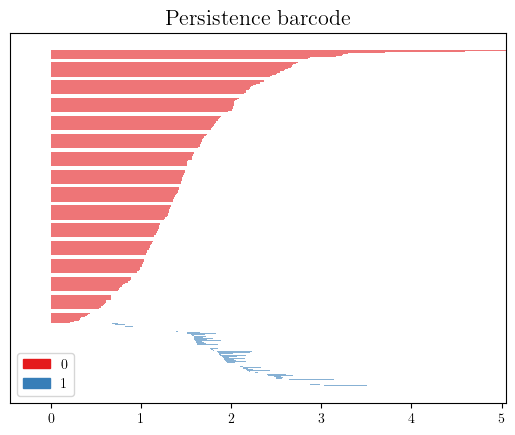

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance_matrix
import gudhi as gd

def compute_distances_and_plot_barcode(output):
    # Detach the output tensor, squeeze, and convert to numpy array
    output_np = output.squeeze().detach().numpy()

    # Compute the pairwise Euclidean distance matrix
    distances = distance_matrix(output_np, output_np)

    # Compute the persistent homology of the distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=distances, max_edge_length=np.max(distances))
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistent_homology = simplex_tree.persistence(min_persistence=0.001)
    
    # Plot the barcode diagram
    gd.plot_persistence_barcode(persistence=persistent_homology)
    plt.show()

# Compute the barcode diagrams for each context vector
for i, output in enumerate(context_2):
    print(f"Barcode for text {i}:")
    compute_distances_and_plot_barcode(output)

In [17]:
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
from transformers import BertTokenizer

def cluster_and_get_words(context, sentence, eps=0.85):
    # Load pre-trained model tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize input and convert to tensor
    inputs = tokenizer(sentence, return_tensors="pt")
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    # Squeeze the context tensor to remove the batch size dimension
    context = context.squeeze(0)

    # Compute the pairwise distance matrix
    distances = pdist(context.detach().numpy(), 'euclidean')
    dist_matrix = squareform(distances)

    # Run DBSCAN on the distance matrix
    clustering = DBSCAN(eps=eps, min_samples=2, metric='precomputed').fit(dist_matrix)

    # Get the words corresponding to each cluster
    clusters = {}
    for i, label in enumerate(clustering.labels_):
        if label != -1:  # Ignore noise (-1 label)
            if label not in clusters:
                clusters[label] = []
            clusters[label].append(tokens[i])

    return clusters

# Compute the clusters for each context vector
clusters_2 = []
for i, output in enumerate(context_2):
    print(f"Clusters for text {i}:")
    clusters_2.append(cluster_and_get_words(output, text_2[i]))
    for label, words in clusters_2[-1].items():
        print(f"Cluster {label}: {', '.join(words)}")

Clusters for text 0:
Cluster 0: [CLS], deep, artificial, intelligence, ., deep, while, human, naturally, artificial, intelligence, deep, human, incredibly, deep, autonomous, deep, by, deep, accurately, ., natural, language, from, deep, furthermore, deep, from, deep, digital, ., [SEP]
Cluster 1: learning, algorithms
Cluster 2: machine, learning
Cluster 3: of, data
Cluster 4: significant, achievement
Cluster 5: patient, care
Cluster 6: interact, with, surroundings
Cluster 7: large, amounts
Cluster 8: situations, ,
Cluster 9: also, being
Cluster 10: interact, with
Cluster 11: interact, with


---

In [18]:
# Set the layer and head to use for computation
layer = 7
head = 9

# Compute the context vectors for each text in the corpus
context_3 = [compute_output(t, layer, head) for t in text_2]
print(context_3[0].shape)
print(context_3[0])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([1, 288, 64])
tensor([[[-0.0807,  0.0148,  0.0438,  ...,  0.0662, -0.1268,  0.0168],
         [-0.0679,  0.0386,  0.0325,  ...,  0.0441, -0.1359,  0.0619],
         [-0.0821,  0.0272,  0.0298,  ...,  0.0562, -0.1302,  0.0434],
         ...,
         [-0.4358,  0.3769, -0.1707,  ...,  0.3138,  0.6127, -0.3990],
         [-0.0761,  0.0092,  0.0544,  ...,  0.0791, -0.0893, -0.0014],
         [-0.0720,  0.0275,  0.0481,  ...,  0.0695, -0.1040,  0.0042]]],
       grad_fn=<CloneBackward0>)


Barcode for text 0:


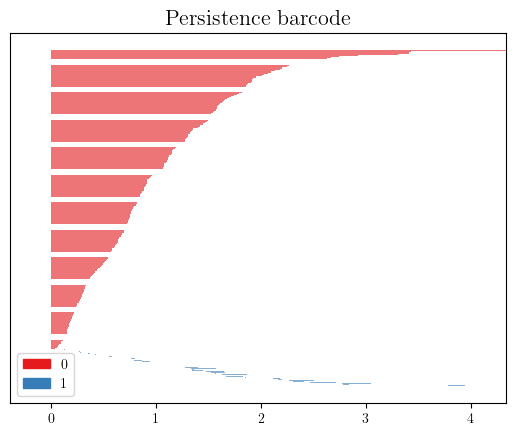

In [19]:
# Compute the barcode diagrams for each context vector
for i, output in enumerate(context_3):
    print(f"Barcode for text {i}:")
    compute_distances_and_plot_barcode(output)

In [20]:
def cluster_and_get_words(context, sentence, eps=0.9):
    # Load pre-trained model tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize input and convert to tensor
    inputs = tokenizer(sentence, return_tensors="pt")
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    # Squeeze the context tensor to remove the batch size dimension
    context = context.squeeze(0)

    # Compute the pairwise distance matrix
    distances = pdist(context.detach().numpy(), 'euclidean')
    dist_matrix = squareform(distances)

    # Run DBSCAN on the distance matrix
    clustering = DBSCAN(eps=eps, min_samples=2, metric='precomputed').fit(dist_matrix)

    # Get the words corresponding to each cluster
    clusters = {}
    for i, label in enumerate(clustering.labels_):
        if label != -1:  # Ignore noise (-1 label)
            if label not in clusters:
                clusters[label] = []
            clusters[label].append(tokens[i])

    return clusters

# Compute the clusters for each context vector
clusters_3 = []
for i, output in enumerate(context_3):
    print(f"Clusters for text {i}:")
    clusters_3.append(cluster_and_get_words(output, text_2[i]))
    for label, words in clusters_3[-1].items():
        print(f"Cluster {label}: {', '.join(words)}")

Clusters for text 0:
Cluster 0: [CLS], deep, learning, has, artificial, intelligence, ,, across, ., deep, learning, algorithms, ,, a, subset, machine, learning, ,, allow, vast, ., while, a, human, brain, naturally, ,, teaching, a, ., deep, learning, models, can, identify, and, human, decision, making, ,, which, makes, incredibly, valuable, for, ., for, instance, ,, in, the, healthcare, sector, ,, deep, learning, algorithms, are, being, utilized, for, patient, ., similarly, ,, in, the, field, autonomous, ,, deep, learning, plays, these, vehicles, understand, interact, their, ., by, ,, deep, learning, models, can, accurately, ,, thereby, ., moreover, ,, deep, learning, is, also, ., from, voice, sir, translation, ,, understand, interact, ., furthermore, ,, deep, learning, is, also, paving, image, video, processing, ., from, to, video, ,, deep, learning, algorithms, digital, ., [SEP]
Cluster 1: innovative, solutions
Cluster 2: various, industries
Cluster 3: understand, learn
Cluster 4: sig

The point that we would like to illustrate is that using persistent homology to perform inform the parameters of a density based clustering algorithm like DBSCAN provides us a way to use individual attention heads to extract collocations and keyphrases of a text. The fact that an individual attention head can be used to find collocations and keyphrases is really fascinating! It also provides us with a way to compare different heads linguistically, as some heads do this better than others, and some tend to find certain collocations and keyphrases better than other collocations and keyphrases. So, we could potentially use this to better train models, or select which heads to apply Low Rank Adaptations (LoRAs) to in place of fine-tuning the entire model. In other words, if we train a LoRA to modify the behavior of individual attention heads so that they better detect certain collocations and keyphrases for different kinds of text corpora, we can get a more robust model overall. We might also use this to better find problematic knowledge that the model has learned and train this out of the model using a LoRA in place of fine tuning the entire model. We can test how each individual attention head behaves over a wide range of text corpora that is known to have certain kinds of problematic information in it, and deter the model from focusing on this kind of knowledge, treating its context vectors as "noise" (in terms of the DBSCAN). We can also use this to train models to detect problematic material in content. 